In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from matplotlib.pyplot import plot
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("birlesmis_data.csv")
genre_data = pd.read_csv('data_by_genres.csv')
year_data = pd.read_csv('data_by_year.csv')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324543 entries, 0 to 1324542
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   valence           1324543 non-null  float64
 1   year              1324543 non-null  int64  
 2   acousticness      1324543 non-null  float64
 3   artists           1324542 non-null  object 
 4   danceability      1324543 non-null  float64
 5   duration_ms       1324543 non-null  int64  
 6   energy            1324543 non-null  float64
 7   explicit          164794 non-null   float64
 8   id                1324543 non-null  object 
 9   instrumentalness  1324543 non-null  float64
 10  key               1324543 non-null  int64  
 11  liveness          1324543 non-null  float64
 12  loudness          1324543 non-null  float64
 13  mode              1324543 non-null  int64  
 14  name              1324543 non-null  object 
 15  popularity        1324543 non-null  int64  
 16  

In [4]:
print(genre_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB
None


In [5]:
print(year_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB
None


# BASE CODE

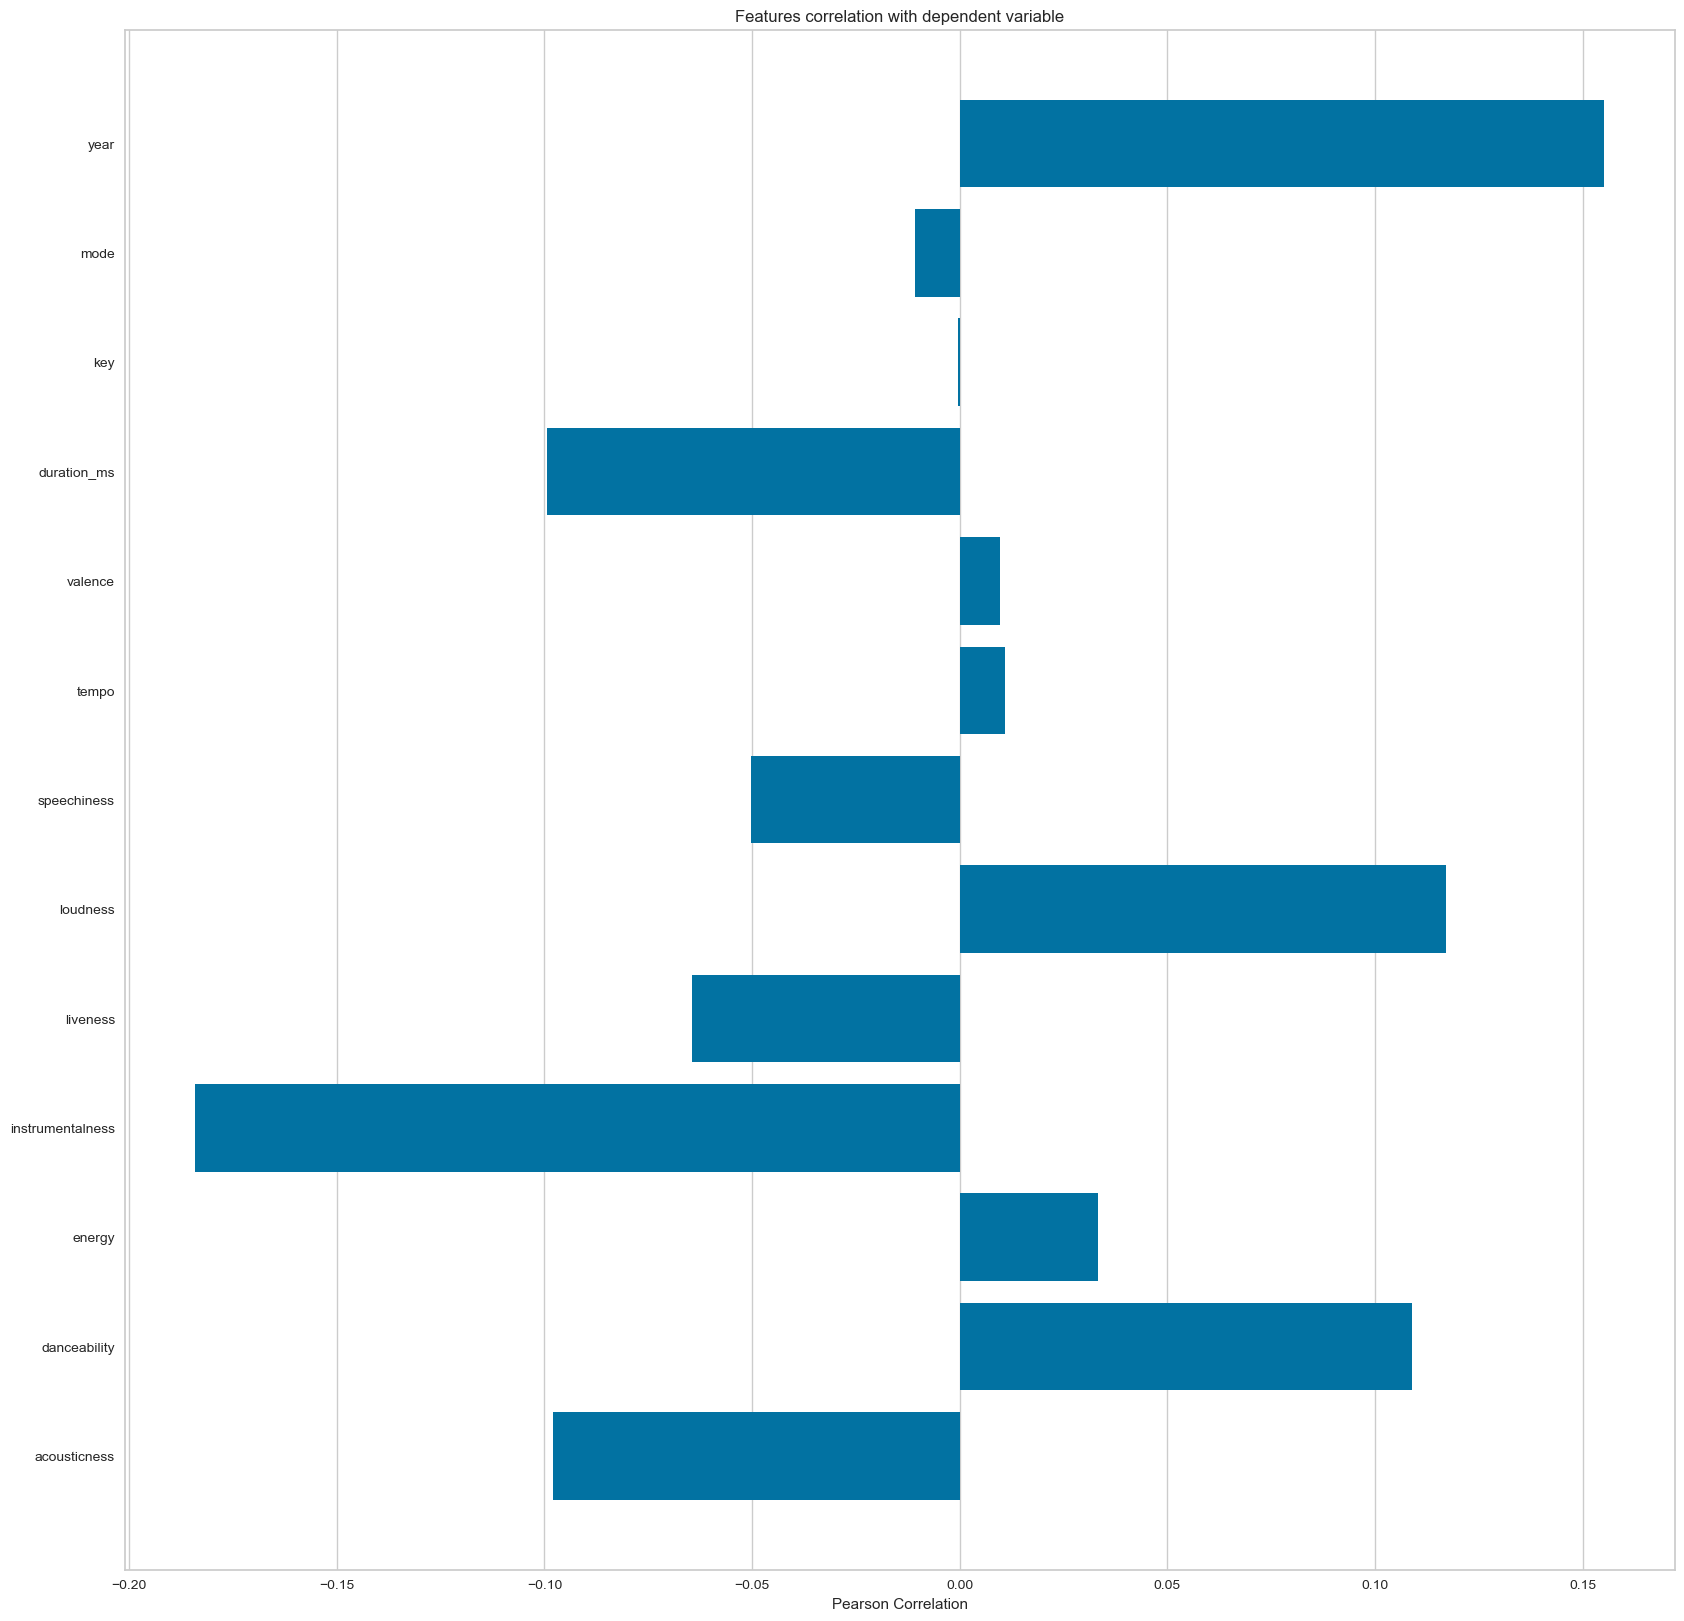

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [6]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','key','mode','year']

X, y = data[feature_names], data['popularity']

features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     
visualizer.show()

<Axes: xlabel='count', ylabel='decade'>

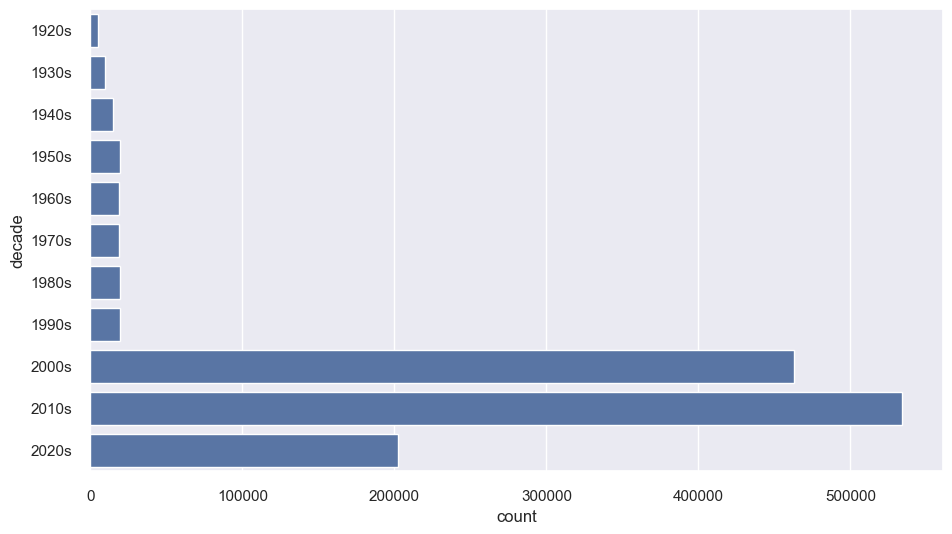

In [7]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(data['decade'])

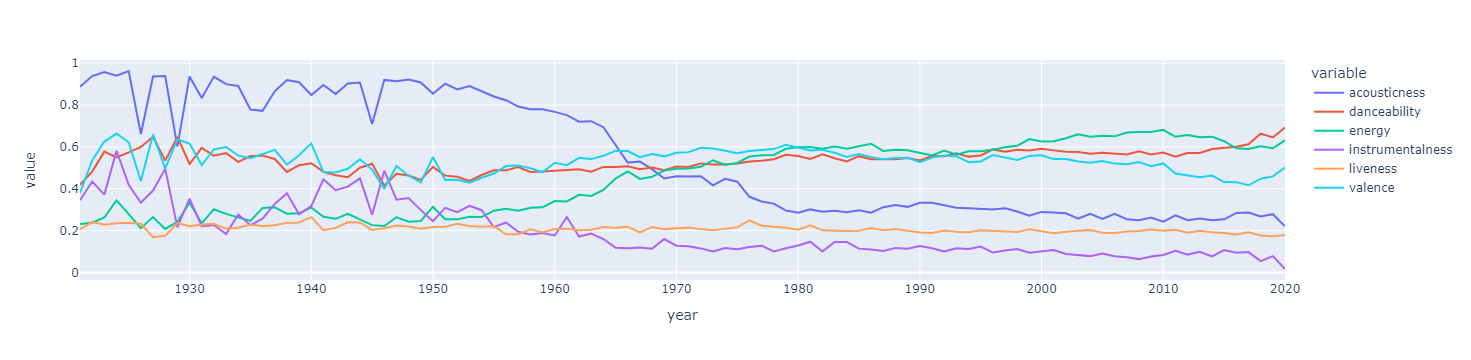

In [8]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features)
fig.show()

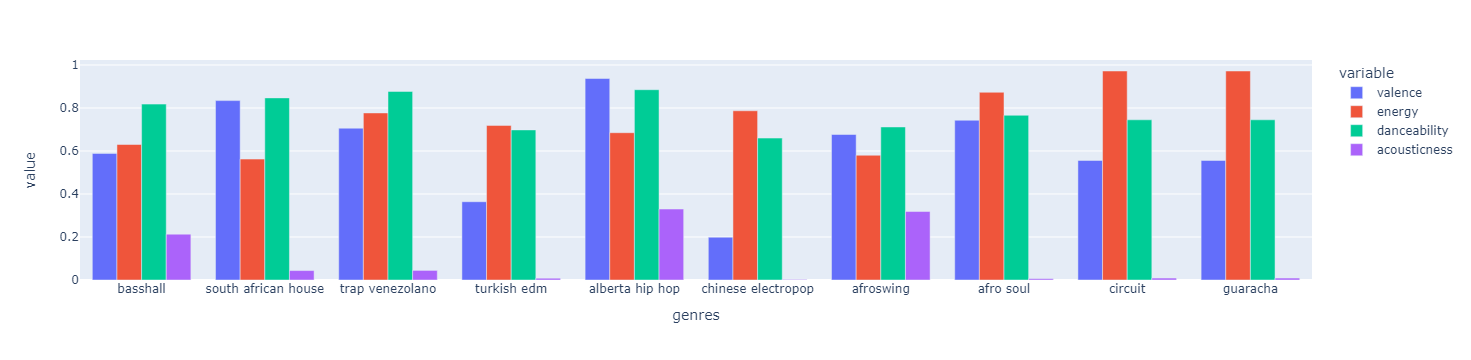

In [9]:
top10_genres = genre_data.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

# Clustering Genres with K-Means

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_init=10))])
X = genre_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.004s...
[t-SNE] Computed neighbors for 2973 samples in 0.335s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.105988
[t-SNE] KL divergence after 1000 iterations: 1.392504


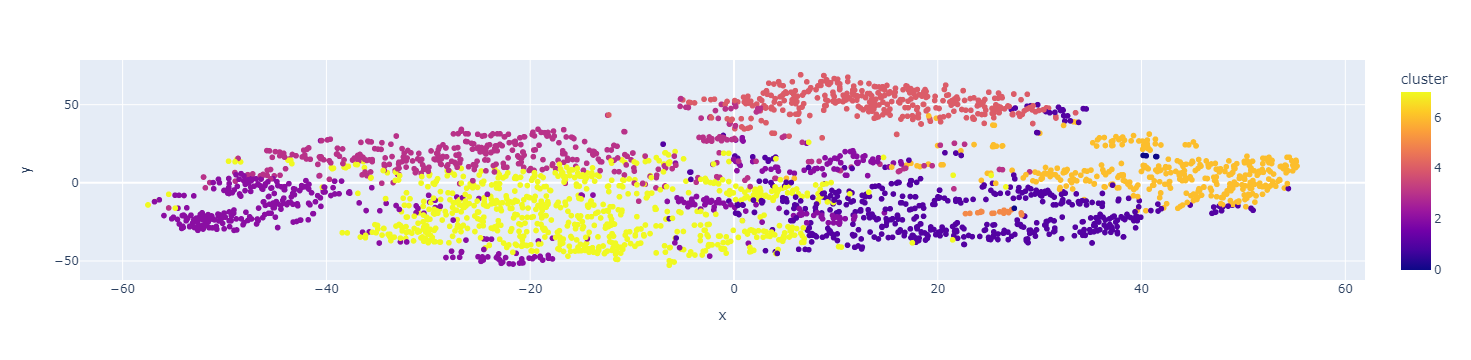

In [11]:
# Visualizing the Clusters with t-SNE

from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

# Clustering Songs with K-Means

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, random_state=0))])
X = genre_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

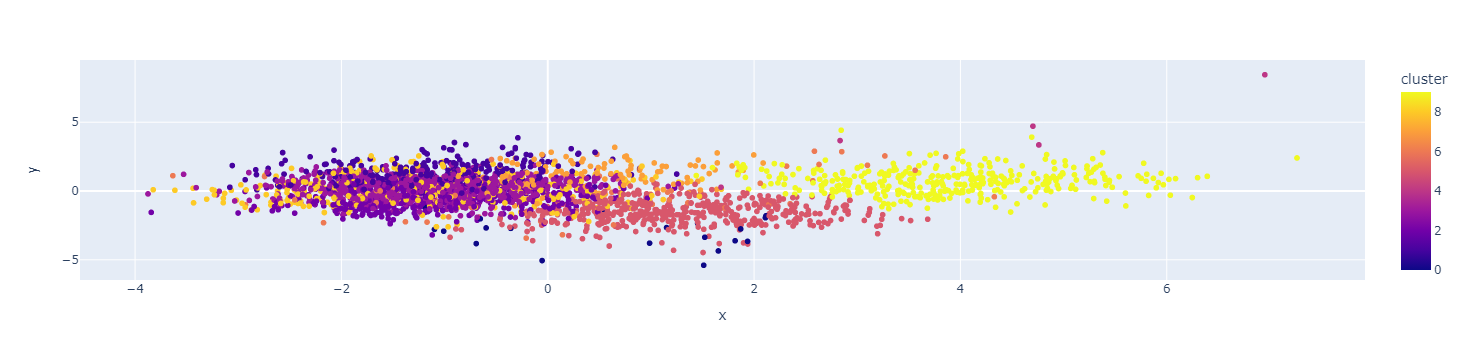

In [13]:
# Visualizing the Clusters with PCA

from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = data['name']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

# Building Recommed System

In [24]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=os.environ["SPOTIFY_CLIENT_ID"],
                                                           client_secret=os.environ["SPOTIFY_CLIENT_SECRET"]))


def find_song(name, year):
    song_data = defaultdict()
    results = sp.search(q='track: {} year: {}'.format(name, year), limit=1)
    if results['tracks']['items'] == []:
        return None

    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    return pd.DataFrame(song_data)

In [27]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy',
               'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']


def get_song_data(song, spotify_data):
    try:
        song_data = spotify_data[(spotify_data['name'] == song['name'])
                                 & (spotify_data['year'] == song['year'])].iloc[0]
        # Şarkı verilerinde 'popularity' sütunu olup olmadığını kontrol et
        if 'popularity' not in song_data:
            print('Warning: {} does not have "popularity" data'.format(song['name']))
            return None
        return song_data

    except IndexError:
        return find_song(song['name'], song['year'])



def get_mean_vector(song_list, spotify_data):
    song_vectors = []

    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in the database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        if len(song_vector) != len(number_cols):
            print('Warning: {} has missing or incorrect features'.format(song['name']))
            continue
        song_vectors.append(song_vector)

    song_matrix = np.array(song_vectors)
    return np.mean(song_matrix, axis=0)


def flatten_dict_list(dict_list):
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []

    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)

    return flattened_dict


def recommend_songs(song_list, spotify_data, n_songs=10):
    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)

    song_center = get_mean_vector(song_list, spotify_data)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])

    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')

In [28]:
# Firebase'e bağlanma
cred = credentials.Certificate("serendipity-0-firebase-adminsdk-14fzt-004a797afa.json")
try:
    firebase_admin.initialize_app(cred)
except ValueError:
    pass  # Zaten başlatılmış

# Firestore istemcisini al
db = firestore.client()


def get_songs_from_firestore():
    songs_ref = db.collection('songs')
    songs = [song.to_dict() for song in songs_ref.stream()]
    return songs


# Firestore'dan şarkı verilerini al
songs_data = get_songs_from_firestore()

# Örnek bir veri çerçevesi
data = pd.DataFrame(songs_data)

# Şarkı önerileri almak için recommend_songs fonksiyonunu kullan
recommendations = recommend_songs(songs_data, data)

print(recommendations)

KeyError: "['popularity'] not in index"

In [18]:
recommend_songs([{'name':'This I Love', 'year':2008}],  data)

[{'name': '24', 'year': 2015, 'artists': 'Lana Del Rey'},
 {'name': 'Pensando en ti - Versión 2011',
  'year': 2011,
  'artists': 'Mägo de Oz'},
 {'name': 'Hallelujah', 'year': 2016, 'artists': "['Theory of a Deadman']"},
 {'name': 'Ton héritage', 'year': 2010, 'artists': 'Benjamin Biolay'},
 {'name': 'Celestial Bodies',
  'year': 2016,
  'artists': "['GHOST DATA', 'Jovani Occomy']"},
 {'name': 'In the Woods Somewhere', 'year': 2014, 'artists': "['Hozier']"},
 {'name': 'In the Woods Somewhere', 'year': 2014, 'artists': 'Hozier'},
 {'name': "I Can't Go on Without You", 'year': 2016, 'artists': "['KALEO']"}]